In [1]:
#This is my humble contribution to this marvelous project
#First, get'em packages

#Install yfinance with pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import yfinance as yf

In [3]:
#Do some damn Data Manipulation

#First, put in your path of the CountryIndexList.xlsx and define, in which folders the graphs and the 
#correlation matrix should be stored.
#MyLaptop
stockMarketList = pd.read_excel('C:/Users/pneiger/Documents/Python Scripts/CAS Applied Data Science/CAS M2/Exam/Data/CountryIndexList.xlsx')
#MyPC
#stockMarketList = pd.read_excel('C:/Users/Schatzli/Documents/Python Scripts/Exam/Data/CountryIndexList.xlsx')

#graphsFolder = 'C:/Users/Schatzli/Documents/Python Scripts/Exam/Graphs/'
graphsFolder ='C:/Users/pneiger/Documents/Python Scripts/CAS Applied Data Science/CAS M2/Exam/'
#corrDataFolder = 'C:/Users/Schatzli/Documents/Python Scripts/Exam/'
corrDataFolder ='C:/Users/pneiger/Documents/Python Scripts/CAS Applied Data Science/CAS M2/Exam/'
#Now we read in the covid data from an online source. If you want, you can read that data in from a folder from
#your computer. Just put in the whole file path.
covidData = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
countriesToAnalyze = stockMarketList['Country']
indexesToAnalyze = stockMarketList['RIC']
indexLabels = stockMarketList['Stock_Index']

countryCovidData = []
stockData = []

#Here we create a standardized date index and create a data frame for each country
for a in range(len(countriesToAnalyze)):
    tempDateIndex = []
    tempCountry = countriesToAnalyze[a]
    tempIndex = indexesToAnalyze[a]
    
    tempCovidData = covidData[covidData['countriesAndTerritories']==tempCountry]
    tempCovidData = tempCovidData.reset_index(drop=True)
    tempDateIndex = pd.DataFrame(np.zeros([len(tempCovidData),1]))
    
    for b in range(len(tempCovidData)):
        tempDateIndex[b] = datetime.date(tempCovidData['year'][b], tempCovidData['month'][b], tempCovidData['day'][b])
    
    tempCovidData = tempCovidData.set_index([pd.Index(tempDateIndex.iloc[0,])])
    tempCovidData = tempCovidData.drop(columns=['dateRep', 'day', 'month', 'year', 'countryterritoryCode'])
    tempStockData = yf.download(tempIndex, start="2019-09-30", end="2020-10-02")
    
    countryCovidData.append(tempCovidData)
    stockData.append(tempStockData)

#Now we fill up our data, since we want to check one year. Missing data is filled with 0s for Covid data and
#linearlly interpolated for stock data
    
dateIndex01CovidData = pd.date_range(start='12/30/2019', end='10/1/2020', freq='D')
dateIndex02CovidData = pd.date_range(start='10/1/2019', end='10/1/2020', freq='D')
dateIndexStockData = pd.date_range(start='09/30/2019', end='10/1/2020', freq='D')

for c in range(len(countriesToAnalyze)):
    countryCovidData[c] = countryCovidData[c].iloc[countryCovidData[c].index < datetime.date(2020,10,2)]
    countryCovidData[c] = countryCovidData[c].reindex(dateIndex01CovidData, method='nearest')
    countryCovidData[c]['cases'].iloc[0] = int(0)
    countryCovidData[c]['deaths'].iloc[0] = int(0)
    countryCovidData[c] = countryCovidData[c].reindex(dateIndex02CovidData, method='nearest')
    
    stockData[c] = stockData[c].reindex(dateIndexStockData).interpolate(method='linear')
    stockData[c] = stockData[c].iloc[stockData[c].index > pd.to_datetime(datetime.date(2019,9,30))]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\pneiger\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


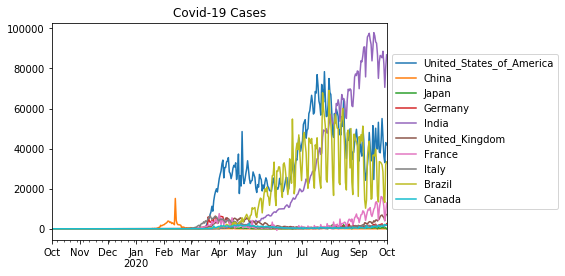

In [4]:
#Data visualization and analysis

#Show Covid plot
fig, ax = plt.subplots(1,1)
for d in range(len(countryCovidData)):
    countryCovidData[d]['cases'].plot(title='Covid-19 Cases',label=countryCovidData[d]['countriesAndTerritories'][0]).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

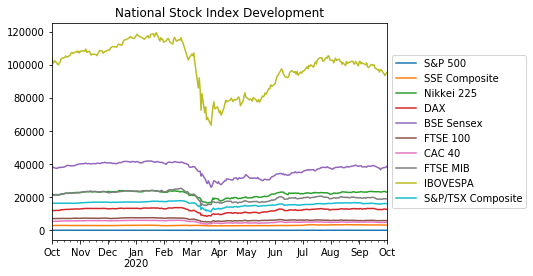

In [5]:
#Show stock index plot
fig, ax = plt.subplots(1,1)
for e in range(len(countryCovidData)):
    stockData[e]['Adj Close'].plot(title='National Stock Index Development',label=indexLabels[e]).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [6]:
#Calculate relative Cases/Deaths and daily change for the stock index
relativeCasesData = []
relativeDeathsData = []

for f in range(len(countriesToAnalyze)):
    tempRelativeCases = pd.DataFrame(data = [countryCovidData[f]['cases'] / countryCovidData[f]['popData2019']*10])
    tempRelativeCases_trans = tempRelativeCases.T
    tempRelativeCases_trans.columns = ['Relative_Cases']
    
    tempRelativeDeaths = pd.DataFrame(data = [countryCovidData[f]['deaths'] / countryCovidData[f]['popData2019']*10])
    tempRelativeDeaths_trans = tempRelativeDeaths.T
    tempRelativeDeaths_trans.columns = ['Relative_Deaths']
    
    tempRelativeStock = pd.DataFrame(data = [stockData[f]['Open'] / stockData[f]['Adj Close']-1])
    tempRelativeStock_trans = tempRelativeStock.T*10
    tempRelativeStock_trans.columns = ['Index_Change']
    
    tempCasesStockData = pd.concat([tempRelativeCases_trans,tempRelativeStock_trans],axis = 1)
    tempDeathStockData = pd.concat([tempRelativeDeaths_trans,tempRelativeStock_trans],axis = 1)
        
    relativeCasesData.append(tempCasesStockData)
    relativeDeathsData.append(tempDeathStockData)  

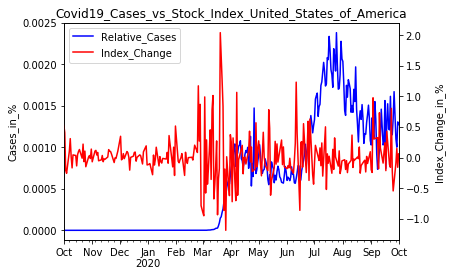

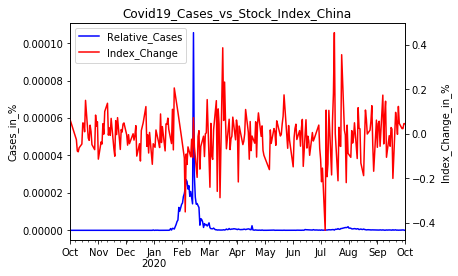

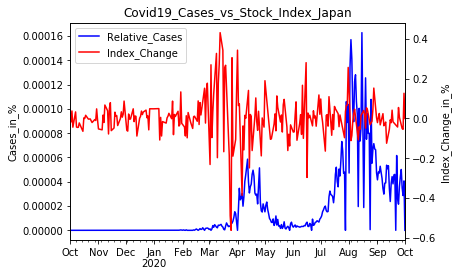

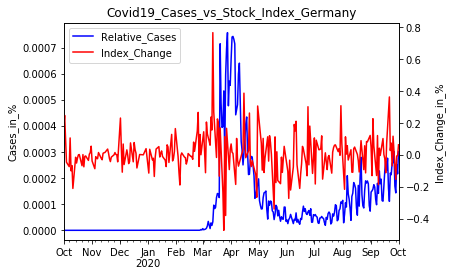

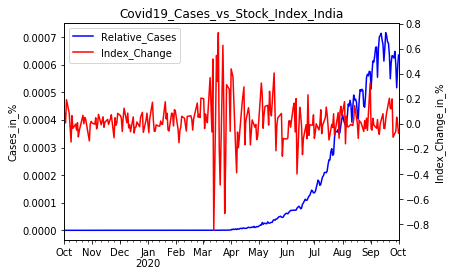

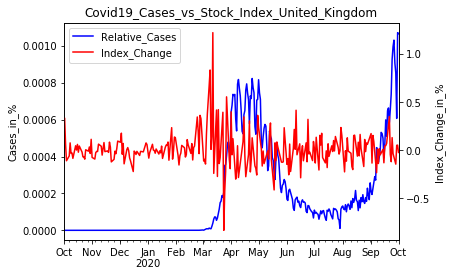

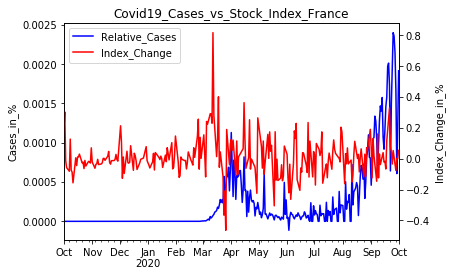

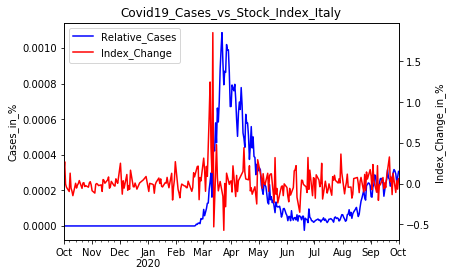

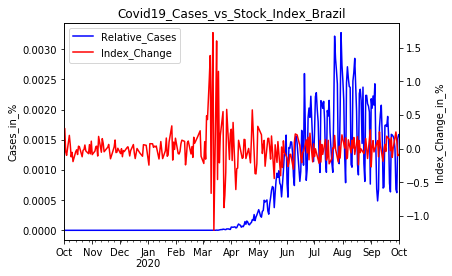

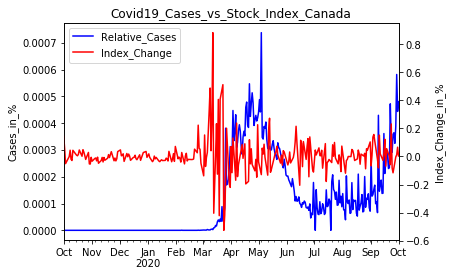

In [7]:
#Plot relative Cases with daily stock index change in per cent
for g in range(len(countriesToAnalyze)):
    fig1, ax1 = plt.subplots()
    ax1 = relativeCasesData[g]['Relative_Cases'].plot(style = 'b-',title='Covid19_Cases_vs_Stock_Index_'+countriesToAnalyze[g])
    ax2 = relativeCasesData[g]['Index_Change'].plot(style = 'r-', secondary_y=True)
    ax1.legend([ax1.get_lines()[0], ax1.right_ax.get_lines()[0]],\
           ['Relative_Cases','Index_Change'], loc ='upper left',bbox_to_anchor=(0.0, 1.0))
    ax1.set_ylabel('Cases_in_%')
    ax2.set_ylabel('Index_Change_in_%')
    fig1.savefig(graphsFolder+countriesToAnalyze[g]+'RelativeCases.png', bbox_inches = "tight")

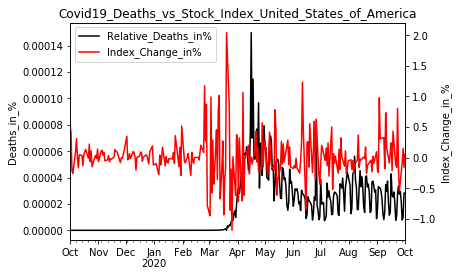

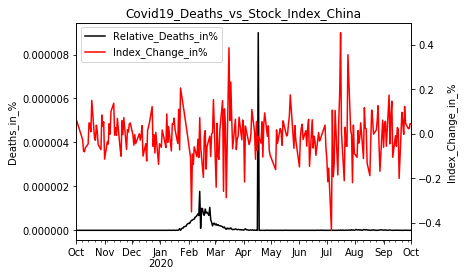

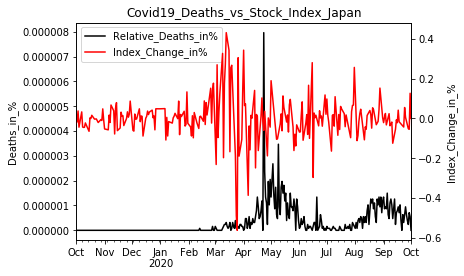

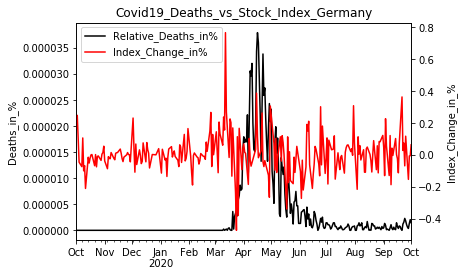

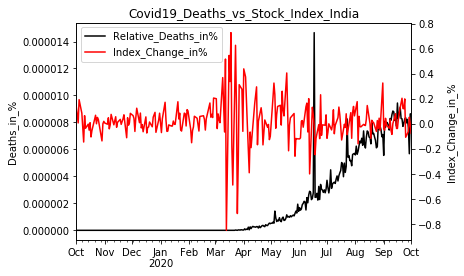

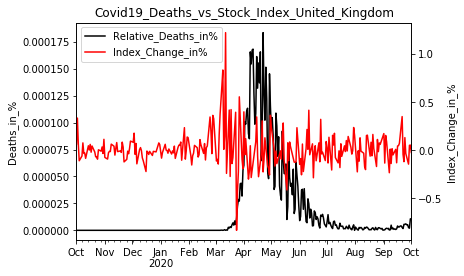

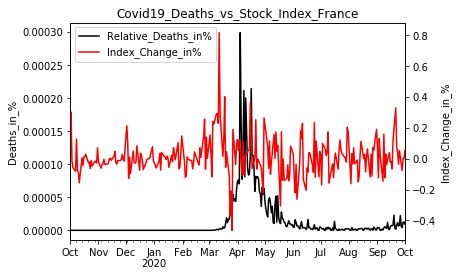

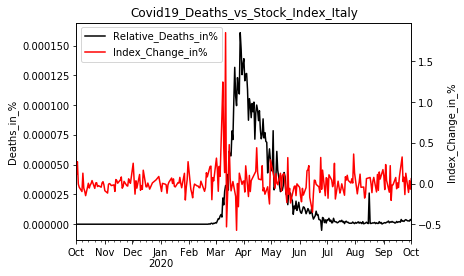

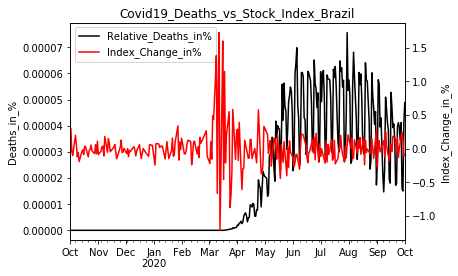

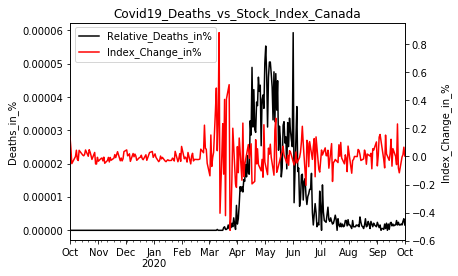

In [8]:
#Plot relative Deaths with daily stock index change in per cent
for g in range(len(countriesToAnalyze)):
    fig1, ax1 = plt.subplots()
    ax1 = relativeDeathsData[g]['Relative_Deaths'].plot(style = 'k-',title='Covid19_Deaths_vs_Stock_Index_'+countriesToAnalyze[g])
    ax2 = relativeDeathsData[g]['Index_Change'].plot(style = 'r-', secondary_y=True)
    ax1.legend([ax1.get_lines()[0], ax1.right_ax.get_lines()[0]],\
           ['Relative_Deaths_in%','Index_Change_in%'], loc ='center left',bbox_to_anchor=(0.0, 0.9))
    ax1.set_ylabel('Deaths_in_%')
    ax2.set_ylabel('Index_Change_in_%')
    fig1.savefig(graphsFolder+countriesToAnalyze[g]+'RelativeDeaths.png', bbox_inches = "tight")

In [9]:
#Now lets do overall Pearson correlation

statisticsDataOverall = []

weeklyCorrelationCasesData = []

weeklyCorrelationDeathsData = []

writerCorrelations = pd.ExcelWriter(corrDataFolder+'OverallCorrelations.xlsx',engine='xlsxwriter')

for h in range(len(countriesToAnalyze)):
    overallCorrCases, overallPValueCases = stats.pearsonr(relativeCasesData[h]['Relative_Cases'], relativeCasesData[h]['Index_Change'])

    overallCorrDeaths, overallPValueDeaths = stats.pearsonr(relativeDeathsData[h]['Relative_Deaths'], relativeDeathsData[h]['Index_Change'])

    statisticsData = pd.DataFrame({'Correlation':[overallCorrCases,overallCorrDeaths], 'P_Value':[overallPValueCases,overallPValueDeaths]},index=['Cases','Deaths'])
    statisticsData.to_excel(writerCorrelations, sheet_name=countriesToAnalyze[h])
    
    print(countriesToAnalyze[h])
    print(statisticsData)
    print()
    statisticsDataOverall.append(statisticsData)
    
writerCorrelations.save()

United_States_of_America
        Correlation   P_Value
Cases     -0.046523  0.374166
Deaths    -0.023432  0.654572

China
        Correlation   P_Value
Cases     -0.080474  0.123831
Deaths    -0.045444  0.385364

Japan
        Correlation   P_Value
Cases     -0.034015  0.515952
Deaths    -0.033029  0.528202

Germany
        Correlation   P_Value
Cases     -0.020324  0.697975
Deaths     0.010026  0.848200

India
        Correlation   P_Value
Cases     -0.034045  0.515578
Deaths    -0.056678  0.278828

United_Kingdom
        Correlation   P_Value
Cases     -0.087442  0.094399
Deaths    -0.114046  0.028927

France
        Correlation   P_Value
Cases      0.087604  0.093786
Deaths     0.044913  0.390947

Italy
        Correlation   P_Value
Cases      0.060314  0.249093
Deaths     0.022080  0.673311

Brazil
        Correlation   P_Value
Cases     -0.055409  0.289751
Deaths    -0.074277  0.155590

Canada
        Correlation   P_Value
Cases     -0.115364  0.027113
Deaths    -0.094428  0.07078

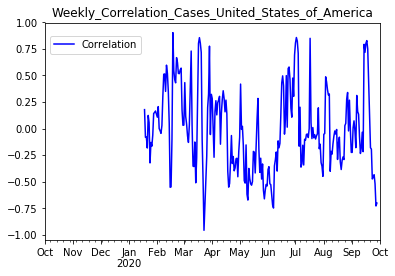

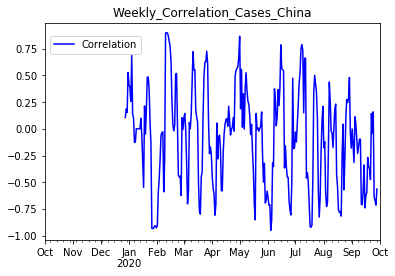

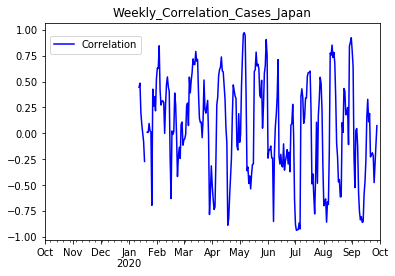

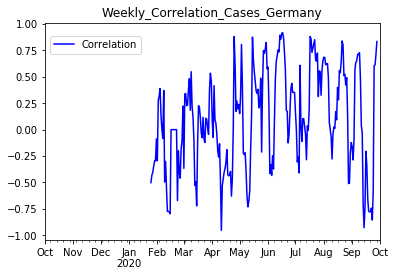

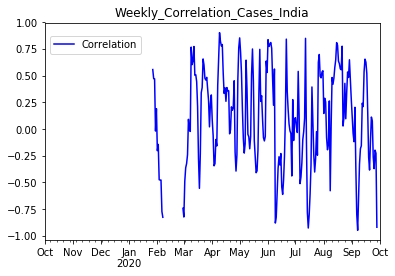

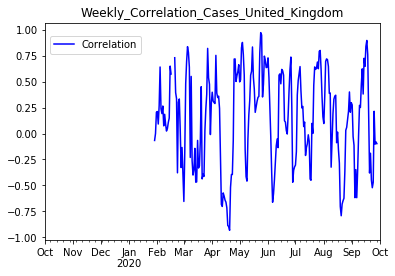

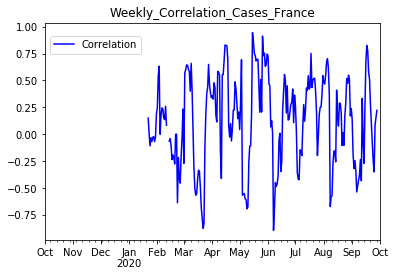

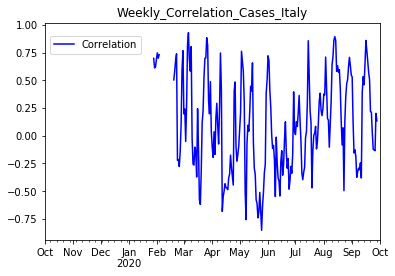

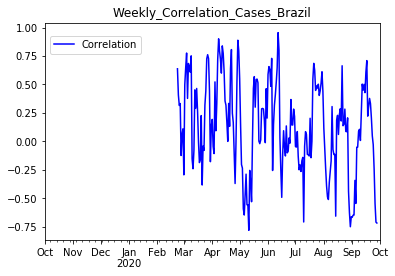

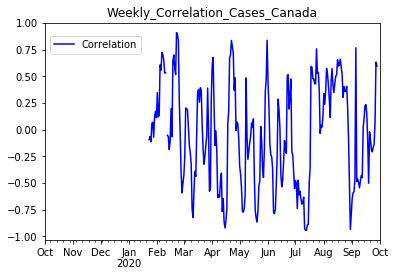

In [10]:
#And here we do weekly correlation. The missing of a line signals that the data of at least one data set was 0
#and we directly plot the correlations
#First for cases correlated with stock index change
corrWindowSize = 7

styleGuide = ['']

for i in range(len(countriesToAnalyze)):
    fig1, ax1 = plt.subplots()
    tempWeeklyCorrCases = relativeCasesData[i]['Relative_Cases'].rolling(window=corrWindowSize, center=True).corr(relativeCasesData[i]['Index_Change'])
    
    weeklyCorrelationCasesData.append(tempWeeklyCorrCases)
    
    ax1 = tempWeeklyCorrCases.plot(style = 'b-', title='Weekly_Correlation_Cases_'+countriesToAnalyze[i])
    ax1.legend(['Correlation'], loc ='center left',bbox_to_anchor=(0.0, 0.9))
    plt.show()
    fig1.savefig(graphsFolder+countriesToAnalyze[i]+'WeeklyCorrCases.png', bbox_inches = "tight")

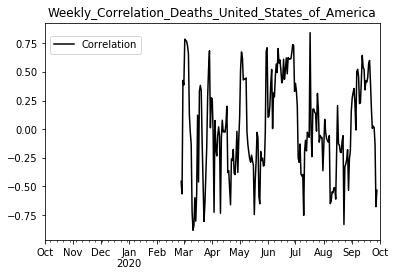

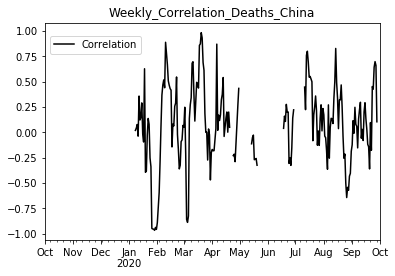

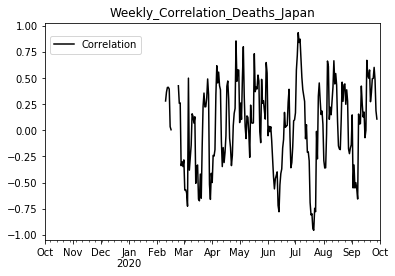

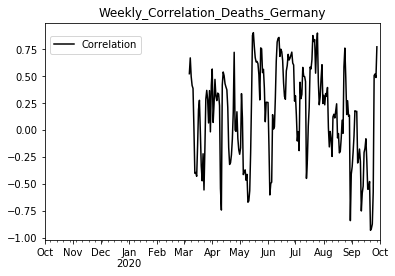

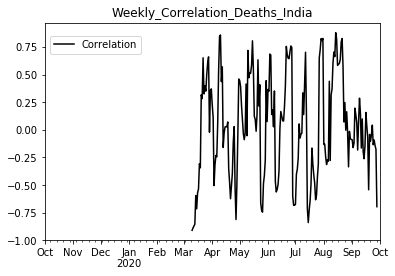

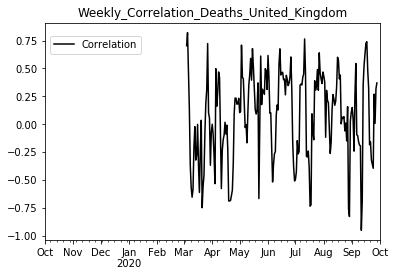

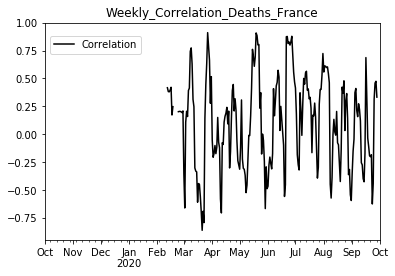

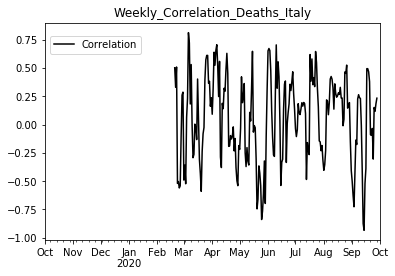

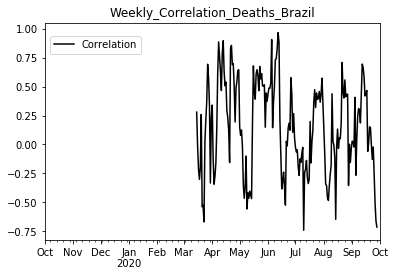

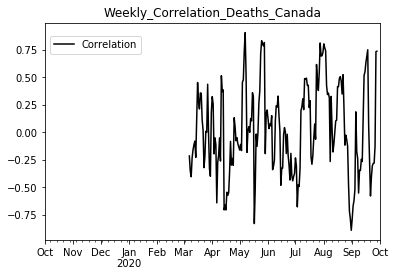

In [11]:
#Second for deaths correlated with stock index change
for j in range(len(countriesToAnalyze)):
    fig1, ax1 = plt.subplots()
    tempWeeklyCorrDeaths = relativeDeathsData[j]['Relative_Deaths'].rolling(window=corrWindowSize, center=True).corr(relativeDeathsData[j]['Index_Change'])
    
    weeklyCorrelationDeathsData.append(tempWeeklyCorrDeaths)
    
    ax1 = tempWeeklyCorrDeaths.plot(style = 'k-',title='Weekly_Correlation_Deaths_'+countriesToAnalyze[j])
    ax1.legend(['Correlation'], loc ='center left',bbox_to_anchor=(0.0, 0.9))
    plt.show()
    fig1.savefig(graphsFolder+countriesToAnalyze[j]+'WeeklyCorrDeaths.png', bbox_inches = "tight")